STLAB IPOPT test
================

In [15]:
from scipy.optimize import rosen, rosen_der
from cyipopt import minimize_ipopt
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize_ipopt(rosen, x0, jac=rosen_der)
print(res)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

     fun: 2.1436081901808772e-18
    info: {'x': array([ 1.,  1.,  1.,  1.,  1.]), 'g': array([], dtype=float64), 'obj_val': 2.1436081901808772e-18, 'mult_g': array([], dtype=float64), 'mult_x_L': array([ 0.,  0.,  0.,  0.,  0.]), 'mult_x_U': array([ 0.,  0.,  0.,  0.,  0.]), 'status': 0, 'status_msg': b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'}
 message: b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
    nfev: 200
     nit: 37
   

In [2]:
import sys
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import basinhopping, Bounds
from scipy.interpolate import interp1d

from pysilsub.problem import SilentSubstitutionProblem
from pysilsub.plotting import stim_plot
from pysilsub.CIE import get_CIES026

sns.set_context('notebook')
sns.set_style('darkgrid')

Load data from sphere
---------------------
These are the data collected by Riccardo on 26/10/2021

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1
Background: None
Ignoring: ['R']
Silencing: ['S', 'M', 'L']
Isolating: ['I']
Target contrast: None
Bounds:
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)


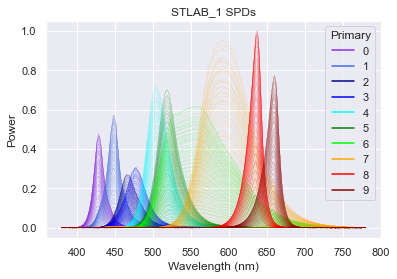

In [50]:
# Instantiate the class / define the problem
ssp = SilentSubstitutionProblem.from_json('../bin/STLAB_1_config.json')
ssp.spds = ssp.spds.div(ssp.spds.max().max(), axis=0)
_ = ssp.plot_spds()

In [51]:
ssp.target_contrast = 1.

In [52]:
ssp.background = [.5] * 10

constraints = [{
    'type': 'eq',
    'fun': ssp.silencing_constraint
}]

result = minimize_ipopt(
    fun=ssp.objective_function,
    x0=ssp.initial_guess_x0(),
    args=(),
    kwargs=None,
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=ssp.bounds,
    constraints=constraints,
    tol=1e-4,
    callback=None,
    options={b'print_level': 5, b'constr_viol_tol': 1e-2},
)

This is Ipopt version 3.14.6, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:       10
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       10
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       10
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.5670075e+00 7.03e-01 8.46e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00  

ValueError: Requested setting 4095 exceeds resolution of device primary 9